In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [66]:
df = pd.read_csv('zomato.csv')  

In [67]:
df.head()

,online_order,book_table,rate,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur
0,1,1,4.1,775,6.684612,0,1,0,0,0,0,0
1,1,0,4.1,787,6.684612,0,1,0,0,0,0,0
2,1,0,3.8,918,6.684612,0,1,0,0,0,0,0
3,0,0,3.7,88,5.703782,0,1,0,0,0,0,0
4,0,0,3.8,166,6.396930,0,0,0,0,1,0,0


In [68]:
df.shape

(49440, 12)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   online_order        49440 non-null  int64  
 1   book_table          49440 non-null  int64  
 2   rate                49440 non-null  float64
 3   votes               49440 non-null  int64  
 4   cost                49440 non-null  float64
 5   BTM                 49440 non-null  int64  
 6   Banashankari        49440 non-null  int64  
 7   Banaswadi           49440 non-null  int64  
 8   Bannerghatta Road   49440 non-null  int64  
 9   Basavanagudi        49440 non-null  int64  
 10  Basaveshwara Nagar  49440 non-null  int64  
 11  Bellandur           49440 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 4.5 MB


In [70]:
# 3. Clean & preprocess
# Parse 'rate' into numeric
df['rate_clean'] = pd.to_numeric(
    df['rate'].astype(str).str.split('/').str[0],
    errors='coerce'
)

In [71]:
# Rename cost column if needed
if 'cost' in df.columns:
    df = df.rename(columns={'cost': 'cost_for_two'})
# Drop rows with missing target or features
df = df.dropna(subset=['rate_clean', 'cost_for_two', 'votes'])

In [72]:
# 3. Quick checks
print("Total rows after cleaning:", df.shape[0])
print("Columns available:", df.columns.tolist())
print(df[['rate_clean','cost_for_two','votes']].head(), "\n")

Total rows after cleaning: 49440
Columns available: ['online_order', 'book_table', 'rate', 'votes', 'cost_for_two', 'BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road', 'Basavanagudi', 'Basaveshwara Nagar', 'Bellandur', 'rate_clean']
   rate_clean  cost_for_two  votes
0         4.1      6.684612    775
1         4.1      6.684612    787
2         3.8      6.684612    918
3         3.7      5.703782     88
          3.8      6.396930    166



In [73]:
# 4. Feature selection
X = df[['cost_for_two', 'votes']]
Y = df['rate_clean']


In [74]:
# 5. Split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, Y_train.shape)
print("Test shape: ", X_test.shape, Y_test.shape, "\n")

Train shape: (39552, 2) (39552,)
Test shape:  (9888, 2) (9888,) 



In [75]:
# 6. Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [76]:
# 7. Evaluate
test_pred = rf_model.predict(X_test)
print("Test RMSE: ", metrics.mean_squared_error(Y_test, test_pred, squared=False))
print("Test R²:   ", metrics.r2_score(Y_test, test_pred), "\n")

/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE:  0.24045080732676474
Test R²:    0.6432496975246484 



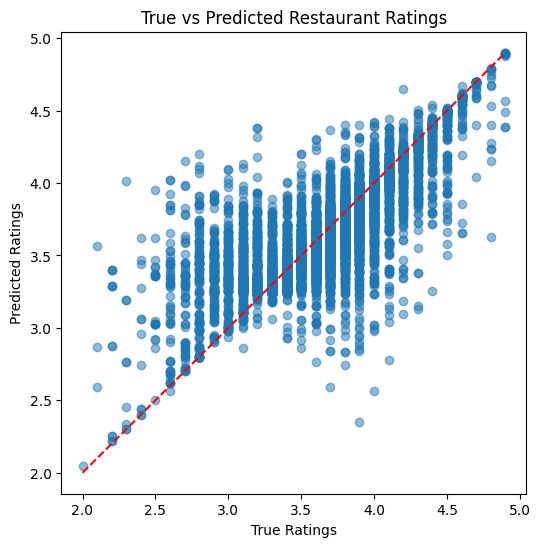

In [77]:
# 8. Plot True vs Predicted
if len(Y_test) > 0:
    plt.figure(figsize=(6, 6))
    plt.scatter(Y_test, test_pred, alpha=0.5)
    plt.plot(
        [Y_test.min(), Y_test.max()],
        [Y_test.min(), Y_test.max()],
        'r--'
    )
    plt.xlabel('True Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('True vs Predicted Restaurant Ratings')
    plt.show()
else:
    print("No test samples to plot. Check your data filtering steps.")